## Setting Random Seed

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

## GPU

In [2]:
# ## GPU
import os
import tensorflow as tf
import keras
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#cpu-gpu configuration
#gpu_options = tf.GPUOptions(visible_device_list="5,6")
os.environ["CUDA_VISIBLE_DEVICES"]="4"

config = tf.ConfigProto(device_count = {'GPU':2, 'CPU':4}) #max no of GPUs = 1, CPUs =4
#config = tf.ConfigProto(gpu_options=gpu_options)

#config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

Using TensorFlow backend.


## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
import ast 
import joblib
import math
import time
current_t = time.time()
from pandas import DataFrame
from array import array
import xgboost 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import VarianceThreshold
import math
import sklearn
from pandas import DataFrame
import pickle
import scipy
from scipy import sparse
import pyodbc
import seaborn as sb
%matplotlib inline
from sklearn import preprocessing
import os
from sklearn.metrics import roc_auc_score  
from scipy.sparse import csr_matrix
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
import warnings
warnings.filterwarnings('ignore')
#from termcolor import colored
from sklearn.metrics import classification_report
from multiprocessing import Pool
from timeit import default_timer as timer
from math import sqrt
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_rand
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg") #Needed to save figures
from sklearn.metrics import roc_auc_score
import sklearn.metrics
import json
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import torch
import time
import numpy as np
import pandas as pd
import cv2 as cv
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize, CascadeClassifier
import glob
from tkinter import *
from PIL import Image, ImageTk
import os
import time, sys
from tkinter import font
import time
import random

/mnt/sde/jagadish/Anaconda3/envs/jag_env/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Import keras models for Neural Network training

In [4]:
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Input, Activation, add, Dense, Flatten, Dropout, Multiply, Embedding, Lambda
from keras.layers import Conv2D, MaxPooling2D,PReLU
from keras import backend as K
from keras.utils.vis_utils import plot_model
import theano
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import Sequence
from keras.utils.np_utils import to_categorical
from keras.layers import LSTM, Dense, Input, Masking, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop

1.9.0


## Read training data files and append to a dataframe

In [5]:

df = pd.DataFrame()
path = r'/mnt/sde/jagadish/userdata/dl_project/tv_train_files/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    dd = pd.read_csv(filename, index_col=None, header=0)
    li.append(dd)

df = pd.concat(li, axis=0, ignore_index=True)

In [7]:
df = df.drop(columns=df.columns[0])

df = df.drop(columns=df.columns[0])
df = df.drop(columns='W')

In [8]:
df.head(1)

,Y,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,...,hrd_200,hrd_201,hrd_202,hrd_203,hrd_204,hrd_205,hrd_206,hrd_207,hrd_208,hrd_209
0,1,153.241352,195.438511,350.214416,397.496091,193.081867,341.508392,360.658405,400.570791,393.141593,...,32.683128,20.391135,16.14928,13.527998,19.520154,25.016024,24.775554,6.144659,7.418,2.8512


In [12]:
df.drop(list(df.filter(regex = 'fd')), axis = 1, inplace = True)

In [13]:
df.head(1)

,Y,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,...,hrd_200,hrd_201,hrd_202,hrd_203,hrd_204,hrd_205,hrd_206,hrd_207,hrd_208,hrd_209
0,1,153.241352,195.438511,350.214416,397.496091,193.081867,341.508392,360.658405,400.570791,393.141593,...,32.683128,20.391135,16.14928,13.527998,19.520154,25.016024,24.775554,6.144659,7.418,2.8512


## Read test data

In [9]:
test = pd.read_table("/mnt/sde/jagadish/userdata/dl_project/tv_test_data/tv_8307.csv",sep=",")

In [10]:
gf = test

In [11]:
gf = gf.drop(columns=gf.columns[0])

In [14]:
gf.drop(list(gf.filter(regex = 'fd')), axis = 1, inplace = True)

In [15]:
gf.head(1)

,Y,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,...,hrd_200,hrd_201,hrd_202,hrd_203,hrd_204,hrd_205,hrd_206,hrd_207,hrd_208,hrd_209
0,1,126.655883,169.499292,320.689287,351.885854,160.37001,311.235204,353.641761,380.183866,375.669492,...,42.465596,25.333625,16.816027,10.877662,18.005547,27.541244,35.963244,9.539451,17.962015,8.422704


## Get features and labels

In [18]:
def get_feature_label(data):
    # remove outliers
    #data_after = data[(data['price']<400) & (data['price']>1)]
    #data_after = data[data['price']>1]
    # split features and labels
    #train_features = data.drop(['responded'],axis=1)
    train_features = data.drop(['Y'],axis=1)
    train_labels = data.Y
    return train_features,train_labels

In [19]:
train_features,train_labels=get_feature_label(df)
train_features=train_features
train_labels=train_labels
test_features,test_labels=get_feature_label(gf)
test_features=test_features
test_labels = test_labels

In [20]:
train_features.head(1)

,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,pd_9,...,hrd_200,hrd_201,hrd_202,hrd_203,hrd_204,hrd_205,hrd_206,hrd_207,hrd_208,hrd_209
0,153.241352,195.438511,350.214416,397.496091,193.081867,341.508392,360.658405,400.570791,393.141593,498.494538,...,32.683128,20.391135,16.14928,13.527998,19.520154,25.016024,24.775554,6.144659,7.418,2.8512


In [21]:
test_features.head(1)

,pd_0,pd_1,pd_2,pd_3,pd_4,pd_5,pd_6,pd_7,pd_8,pd_9,...,hrd_200,hrd_201,hrd_202,hrd_203,hrd_204,hrd_205,hrd_206,hrd_207,hrd_208,hrd_209
0,126.655883,169.499292,320.689287,351.885854,160.37001,311.235204,353.641761,380.183866,375.669492,598.04941,...,42.465596,25.333625,16.816027,10.877662,18.005547,27.541244,35.963244,9.539451,17.962015,8.422704


## Normalizing features

In [22]:
X = train_features
y = train_labels

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [26]:
test_features = scaler.transform(test_features)
test_features = pd.DataFrame(test_features)

## Compile and fit the model

In [28]:
rmsprop = optimizers.RMSprop(lr=0.001)
adam = optimizers.Adam(lr=0.0001)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ada =optimizers.Adadelta(lr=0.0001, rho = 0.95, epsilon = 1e-07)


In [29]:
import time
current_t = time.time()

verbose, epochs, batch_size = 1, 1200, 15
n_features, n_outputs = 720, 1
# define model
model = Sequential()
#kernel_regularizer=regularizers.l2(0.01),
#model.add(LSTM(500, activation='relu',return_sequences=False, input_shape=(n_samples, n_features)))
model.add(Dense(200, activation='relu',
                kernel_regularizer=regularizers.l2(0.001), input_shape=(n_features,)))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='Adam')
model.summary()
# fit network
history = model.fit(X, y, epochs=epochs, batch_size=batch_size,validation_split=0.0, verbose=verbose)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               144200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________
Train on 13276 samples, validate on 1476 samples
Epoch 1/1200
13276/13276 [==============================] - 10s 736us/step - loss: 0.3991 - acc: 0.9076 - val_loss: 0.6139 - val_acc: 0.8178
Epoch 2/1200
13276/13276 [==============================] - 5s 357us/step - loss: 0.2386 - acc: 0.9507 - val_loss: 0.6575 - val_acc: 0.7527
Epoch 3/1200
13276/13276 [==============================] - 5s 361us/s

13276/13276 [==============================] - 4s 316us/step - loss: 0.0917 - acc: 0.9805 - val_loss: 0.2363 - val_acc: 0.9465
Epoch 112/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0877 - acc: 0.9823 - val_loss: 0.2329 - val_acc: 0.9499
Epoch 113/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0924 - acc: 0.9793 - val_loss: 0.2456 - val_acc: 0.9444
Epoch 114/1200
13276/13276 [==============================] - 5s 365us/step - loss: 0.0853 - acc: 0.9832 - val_loss: 0.2540 - val_acc: 0.9397
Epoch 115/1200
13276/13276 [==============================] - 5s 358us/step - loss: 0.0921 - acc: 0.9797 - val_loss: 0.2844 - val_acc: 0.9302
Epoch 116/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0871 - acc: 0.9821 - val_loss: 0.3516 - val_acc: 0.9038
Epoch 117/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0877 - acc: 0.9822 - val_loss: 0.2734 - val_acc: 0.9322
Epoch 118/1200
13276/

Epoch 169/1200
13276/13276 [==============================] - 4s 327us/step - loss: 0.0858 - acc: 0.9827 - val_loss: 0.2608 - val_acc: 0.9404
Epoch 170/1200
13276/13276 [==============================] - 5s 340us/step - loss: 0.0831 - acc: 0.9834 - val_loss: 0.2348 - val_acc: 0.9485
Epoch 171/1200
13276/13276 [==============================] - 5s 358us/step - loss: 0.0962 - acc: 0.9786 - val_loss: 0.2482 - val_acc: 0.9383
Epoch 172/1200
13276/13276 [==============================] - 5s 352us/step - loss: 0.0865 - acc: 0.9819 - val_loss: 0.2547 - val_acc: 0.9397
Epoch 173/1200
13276/13276 [==============================] - 5s 354us/step - loss: 0.0871 - acc: 0.9819 - val_loss: 0.2413 - val_acc: 0.9438
Epoch 174/1200
13276/13276 [==============================] - 5s 351us/step - loss: 0.0877 - acc: 0.9818 - val_loss: 0.2295 - val_acc: 0.9465
Epoch 175/1200
13276/13276 [==============================] - 5s 341us/step - loss: 0.0804 - acc: 0.9850 - val_loss: 0.2329 - val_acc: 0.9492
Epoch 

Epoch 227/1200
13276/13276 [==============================] - 5s 363us/step - loss: 0.0857 - acc: 0.9828 - val_loss: 0.2246 - val_acc: 0.9512
Epoch 228/1200
13276/13276 [==============================] - 4s 286us/step - loss: 0.0893 - acc: 0.9816 - val_loss: 0.2823 - val_acc: 0.9302
Epoch 229/1200
13276/13276 [==============================] - 5s 349us/step - loss: 0.0849 - acc: 0.9827 - val_loss: 0.2234 - val_acc: 0.9485
Epoch 230/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0867 - acc: 0.9826 - val_loss: 0.2444 - val_acc: 0.9438
Epoch 231/1200
13276/13276 [==============================] - 5s 351us/step - loss: 0.0849 - acc: 0.9831 - val_loss: 0.2340 - val_acc: 0.9478
Epoch 232/1200
13276/13276 [==============================] - 5s 373us/step - loss: 0.0867 - acc: 0.9828 - val_loss: 0.3820 - val_acc: 0.8936
Epoch 233/1200
13276/13276 [==============================] - 5s 347us/step - loss: 0.0887 - acc: 0.9804 - val_loss: 0.2563 - val_acc: 0.9363
Epoch 

Epoch 285/1200
13276/13276 [==============================] - 5s 341us/step - loss: 0.0855 - acc: 0.9815 - val_loss: 0.2210 - val_acc: 0.9505
Epoch 286/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0895 - acc: 0.9816 - val_loss: 0.2199 - val_acc: 0.9472
Epoch 287/1200
13276/13276 [==============================] - 5s 360us/step - loss: 0.0851 - acc: 0.9828 - val_loss: 0.2820 - val_acc: 0.9295
Epoch 288/1200
13276/13276 [==============================] - 5s 346us/step - loss: 0.0891 - acc: 0.9815 - val_loss: 0.2270 - val_acc: 0.9485
Epoch 289/1200
13276/13276 [==============================] - 4s 331us/step - loss: 0.0881 - acc: 0.9809 - val_loss: 0.2050 - val_acc: 0.9560
Epoch 290/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0856 - acc: 0.9815 - val_loss: 0.2640 - val_acc: 0.9390
Epoch 291/1200
13276/13276 [==============================] - 4s 330us/step - loss: 0.0869 - acc: 0.9818 - val_loss: 0.2860 - val_acc: 0.9302
Epoch 

Epoch 343/1200
13276/13276 [==============================] - 4s 323us/step - loss: 0.0883 - acc: 0.9811 - val_loss: 0.2382 - val_acc: 0.9444
Epoch 344/1200
13276/13276 [==============================] - 4s 325us/step - loss: 0.0863 - acc: 0.9821 - val_loss: 0.2450 - val_acc: 0.9397
Epoch 345/1200
13276/13276 [==============================] - 4s 337us/step - loss: 0.0946 - acc: 0.9788 - val_loss: 0.2377 - val_acc: 0.9431
Epoch 346/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0854 - acc: 0.9824 - val_loss: 0.2500 - val_acc: 0.9404
Epoch 347/1200
13276/13276 [==============================] - 4s 335us/step - loss: 0.0915 - acc: 0.9813 - val_loss: 0.2571 - val_acc: 0.9438
Epoch 348/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0860 - acc: 0.9824 - val_loss: 0.2592 - val_acc: 0.9356
Epoch 349/1200
13276/13276 [==============================] - 4s 330us/step - loss: 0.0850 - acc: 0.9830 - val_loss: 0.2451 - val_acc: 0.9390
Epoch 

Epoch 401/1200
13276/13276 [==============================] - 4s 338us/step - loss: 0.0836 - acc: 0.9827 - val_loss: 0.2632 - val_acc: 0.9397
Epoch 402/1200
13276/13276 [==============================] - 4s 332us/step - loss: 0.0911 - acc: 0.9806 - val_loss: 0.2553 - val_acc: 0.9397
Epoch 403/1200
13276/13276 [==============================] - 5s 356us/step - loss: 0.0885 - acc: 0.9803 - val_loss: 0.2295 - val_acc: 0.9458
Epoch 404/1200
13276/13276 [==============================] - 5s 353us/step - loss: 0.0880 - acc: 0.9812 - val_loss: 0.2630 - val_acc: 0.9363
Epoch 405/1200
13276/13276 [==============================] - 5s 352us/step - loss: 0.0870 - acc: 0.9815 - val_loss: 0.2252 - val_acc: 0.9458
Epoch 406/1200
13276/13276 [==============================] - 4s 298us/step - loss: 0.0813 - acc: 0.9843 - val_loss: 0.2625 - val_acc: 0.9397
Epoch 407/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0841 - acc: 0.9830 - val_loss: 0.2179 - val_acc: 0.9526
Epoch 

Epoch 459/1200
13276/13276 [==============================] - 4s 329us/step - loss: 0.0858 - acc: 0.9812 - val_loss: 0.2867 - val_acc: 0.9370
Epoch 460/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0895 - acc: 0.9795 - val_loss: 0.2494 - val_acc: 0.9438
Epoch 461/1200
13276/13276 [==============================] - 5s 341us/step - loss: 0.0842 - acc: 0.9821 - val_loss: 0.2534 - val_acc: 0.9458
Epoch 462/1200
13276/13276 [==============================] - 4s 335us/step - loss: 0.0830 - acc: 0.9829 - val_loss: 0.2432 - val_acc: 0.9492
Epoch 463/1200
13276/13276 [==============================] - 5s 352us/step - loss: 0.0817 - acc: 0.9840 - val_loss: 0.2185 - val_acc: 0.9539
Epoch 464/1200
13276/13276 [==============================] - 5s 359us/step - loss: 0.0885 - acc: 0.9809 - val_loss: 0.2367 - val_acc: 0.9519
Epoch 465/1200
13276/13276 [==============================] - 4s 310us/step - loss: 0.0817 - acc: 0.9831 - val_loss: 0.2299 - val_acc: 0.9505
Epoch 

Epoch 517/1200
13276/13276 [==============================] - 4s 324us/step - loss: 0.0832 - acc: 0.9827 - val_loss: 0.2724 - val_acc: 0.9383
Epoch 518/1200
13276/13276 [==============================] - 5s 339us/step - loss: 0.0835 - acc: 0.9824 - val_loss: 0.2435 - val_acc: 0.9444
Epoch 519/1200
13276/13276 [==============================] - 5s 340us/step - loss: 0.0860 - acc: 0.9825 - val_loss: 0.2509 - val_acc: 0.9390
Epoch 520/1200
13276/13276 [==============================] - 4s 335us/step - loss: 0.0850 - acc: 0.9821 - val_loss: 0.2459 - val_acc: 0.9465
Epoch 521/1200
13276/13276 [==============================] - 5s 348us/step - loss: 0.0845 - acc: 0.9822 - val_loss: 0.2253 - val_acc: 0.9519
Epoch 522/1200
13276/13276 [==============================] - 5s 345us/step - loss: 0.0839 - acc: 0.9829 - val_loss: 0.2264 - val_acc: 0.9505
Epoch 523/1200
13276/13276 [==============================] - 4s 324us/step - loss: 0.0861 - acc: 0.9812 - val_loss: 0.2348 - val_acc: 0.9444
Epoch 

Epoch 575/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0880 - acc: 0.9812 - val_loss: 0.2278 - val_acc: 0.9478
Epoch 576/1200
13276/13276 [==============================] - 4s 322us/step - loss: 0.0828 - acc: 0.9833 - val_loss: 0.2799 - val_acc: 0.9390
Epoch 577/1200
13276/13276 [==============================] - 5s 355us/step - loss: 0.0869 - acc: 0.9807 - val_loss: 0.2374 - val_acc: 0.9485
Epoch 578/1200
13276/13276 [==============================] - 5s 346us/step - loss: 0.0816 - acc: 0.9837 - val_loss: 0.2210 - val_acc: 0.9512
Epoch 579/1200
13276/13276 [==============================] - 4s 299us/step - loss: 0.0804 - acc: 0.9828 - val_loss: 0.2317 - val_acc: 0.9485
Epoch 580/1200
13276/13276 [==============================] - 4s 335us/step - loss: 0.0844 - acc: 0.9827 - val_loss: 0.2336 - val_acc: 0.9492
Epoch 581/1200
13276/13276 [==============================] - 5s 341us/step - loss: 0.0839 - acc: 0.9827 - val_loss: 0.2317 - val_acc: 0.9512
Epoch 

Epoch 633/1200
13276/13276 [==============================] - 5s 365us/step - loss: 0.0836 - acc: 0.9827 - val_loss: 0.2245 - val_acc: 0.9512
Epoch 634/1200
13276/13276 [==============================] - 5s 376us/step - loss: 0.0838 - acc: 0.9817 - val_loss: 0.2466 - val_acc: 0.9458
Epoch 635/1200
13276/13276 [==============================] - 4s 332us/step - loss: 0.0863 - acc: 0.9822 - val_loss: 0.2110 - val_acc: 0.9580
Epoch 636/1200
13276/13276 [==============================] - 4s 305us/step - loss: 0.0878 - acc: 0.9809 - val_loss: 0.2669 - val_acc: 0.9397
Epoch 637/1200
13276/13276 [==============================] - 5s 352us/step - loss: 0.0855 - acc: 0.9813 - val_loss: 0.2469 - val_acc: 0.9458
Epoch 638/1200
13276/13276 [==============================] - 4s 333us/step - loss: 0.0901 - acc: 0.9803 - val_loss: 0.4395 - val_acc: 0.8808
Epoch 639/1200
13276/13276 [==============================] - 5s 340us/step - loss: 0.0844 - acc: 0.9828 - val_loss: 0.2587 - val_acc: 0.9316
Epoch 

Epoch 691/1200
13276/13276 [==============================] - 4s 304us/step - loss: 0.0853 - acc: 0.9818 - val_loss: 0.2691 - val_acc: 0.9397
Epoch 692/1200
13276/13276 [==============================] - 5s 349us/step - loss: 0.0833 - acc: 0.9833 - val_loss: 0.2387 - val_acc: 0.9451
Epoch 693/1200
13276/13276 [==============================] - 5s 351us/step - loss: 0.0820 - acc: 0.9837 - val_loss: 0.2864 - val_acc: 0.9336
Epoch 694/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0836 - acc: 0.9821 - val_loss: 0.2192 - val_acc: 0.9512
Epoch 695/1200
13276/13276 [==============================] - 4s 336us/step - loss: 0.0864 - acc: 0.9822 - val_loss: 0.2137 - val_acc: 0.9519
Epoch 696/1200
13276/13276 [==============================] - 4s 325us/step - loss: 0.0826 - acc: 0.9830 - val_loss: 0.2126 - val_acc: 0.9546
Epoch 697/1200
13276/13276 [==============================] - 4s 299us/step - loss: 0.0885 - acc: 0.9811 - val_loss: 0.2502 - val_acc: 0.9411
Epoch 

Epoch 749/1200
13276/13276 [==============================] - 4s 304us/step - loss: 0.0858 - acc: 0.9818 - val_loss: 0.2264 - val_acc: 0.9499
Epoch 750/1200
13276/13276 [==============================] - 4s 328us/step - loss: 0.0834 - acc: 0.9828 - val_loss: 0.2454 - val_acc: 0.9472
Epoch 751/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0879 - acc: 0.9805 - val_loss: 0.2264 - val_acc: 0.9472
Epoch 752/1200
13276/13276 [==============================] - 4s 335us/step - loss: 0.0821 - acc: 0.9833 - val_loss: 0.2323 - val_acc: 0.9472
Epoch 753/1200
13276/13276 [==============================] - 4s 330us/step - loss: 0.0822 - acc: 0.9835 - val_loss: 0.2471 - val_acc: 0.9458
Epoch 754/1200
13276/13276 [==============================] - 5s 348us/step - loss: 0.0862 - acc: 0.9820 - val_loss: 0.2415 - val_acc: 0.9478
Epoch 755/1200
13276/13276 [==============================] - 4s 290us/step - loss: 0.0808 - acc: 0.9837 - val_loss: 0.2400 - val_acc: 0.9465
Epoch 

Epoch 807/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0892 - acc: 0.9802 - val_loss: 0.2409 - val_acc: 0.9465
Epoch 808/1200
13276/13276 [==============================] - 5s 353us/step - loss: 0.0868 - acc: 0.9810 - val_loss: 0.2337 - val_acc: 0.9451
Epoch 809/1200
13276/13276 [==============================] - 5s 365us/step - loss: 0.0858 - acc: 0.9806 - val_loss: 0.2416 - val_acc: 0.9465
Epoch 810/1200
13276/13276 [==============================] - 4s 321us/step - loss: 0.0859 - acc: 0.9812 - val_loss: 0.2253 - val_acc: 0.9519
Epoch 811/1200
13276/13276 [==============================] - 5s 345us/step - loss: 0.0881 - acc: 0.9813 - val_loss: 0.2337 - val_acc: 0.9499
Epoch 812/1200
13276/13276 [==============================] - 5s 341us/step - loss: 0.0825 - acc: 0.9832 - val_loss: 0.2235 - val_acc: 0.9512
Epoch 813/1200
13276/13276 [==============================] - 4s 317us/step - loss: 0.0864 - acc: 0.9814 - val_loss: 0.2520 - val_acc: 0.9458
Epoch 

Epoch 922/1200
13276/13276 [==============================] - 5s 344us/step - loss: 0.0874 - acc: 0.9811 - val_loss: 0.2293 - val_acc: 0.9499
Epoch 923/1200
13276/13276 [==============================] - 5s 354us/step - loss: 0.0859 - acc: 0.9816 - val_loss: 0.2758 - val_acc: 0.9370
Epoch 924/1200
13276/13276 [==============================] - 4s 298us/step - loss: 0.0905 - acc: 0.9796 - val_loss: 0.2300 - val_acc: 0.9499
Epoch 925/1200
13276/13276 [==============================] - 4s 329us/step - loss: 0.0835 - acc: 0.9832 - val_loss: 0.2210 - val_acc: 0.9492
Epoch 926/1200
13276/13276 [==============================] - 4s 328us/step - loss: 0.0830 - acc: 0.9821 - val_loss: 0.2310 - val_acc: 0.9499
Epoch 927/1200
13276/13276 [==============================] - 4s 334us/step - loss: 0.0843 - acc: 0.9821 - val_loss: 0.2248 - val_acc: 0.9492
Epoch 928/1200
13276/13276 [==============================] - 4s 326us/step - loss: 0.0837 - acc: 0.9831 - val_loss: 0.2168 - val_acc: 0.9512
Epoch 

Epoch 980/1200
13276/13276 [==============================] - 4s 324us/step - loss: 0.0904 - acc: 0.9805 - val_loss: 0.2614 - val_acc: 0.9350
Epoch 981/1200
13276/13276 [==============================] - 4s 330us/step - loss: 0.0834 - acc: 0.9815 - val_loss: 0.2386 - val_acc: 0.9451
Epoch 982/1200
13276/13276 [==============================] - 5s 349us/step - loss: 0.0802 - acc: 0.9837 - val_loss: 0.2783 - val_acc: 0.9350
Epoch 983/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0880 - acc: 0.9808 - val_loss: 0.2403 - val_acc: 0.9492
Epoch 984/1200
13276/13276 [==============================] - 5s 342us/step - loss: 0.0805 - acc: 0.9846 - val_loss: 0.2616 - val_acc: 0.9424
Epoch 985/1200
13276/13276 [==============================] - 4s 330us/step - loss: 0.0829 - acc: 0.9831 - val_loss: 0.2280 - val_acc: 0.9505
Epoch 986/1200
13276/13276 [==============================] - 4s 299us/step - loss: 0.0833 - acc: 0.9823 - val_loss: 0.2907 - val_acc: 0.9322
Epoch 

13276/13276 [==============================] - 4s 337us/step - loss: 0.0839 - acc: 0.9824 - val_loss: 0.2397 - val_acc: 0.9492
Epoch 1095/1200
13276/13276 [==============================] - 5s 346us/step - loss: 0.0827 - acc: 0.9823 - val_loss: 0.2541 - val_acc: 0.9458
Epoch 1096/1200
13276/13276 [==============================] - 4s 329us/step - loss: 0.0833 - acc: 0.9825 - val_loss: 0.3130 - val_acc: 0.9187
Epoch 1097/1200
13276/13276 [==============================] - 4s 327us/step - loss: 0.0851 - acc: 0.9819 - val_loss: 0.2330 - val_acc: 0.9438
Epoch 1098/1200
13276/13276 [==============================] - 5s 350us/step - loss: 0.0827 - acc: 0.9818 - val_loss: 0.2247 - val_acc: 0.9499
Epoch 1099/1200
13276/13276 [==============================] - 4s 306us/step - loss: 0.0815 - acc: 0.9834 - val_loss: 0.3592 - val_acc: 0.8970
Epoch 1100/1200
13276/13276 [==============================] - 4s 310us/step - loss: 0.0845 - acc: 0.9813 - val_loss: 0.2147 - val_acc: 0.9539
Epoch 1101/1200

## Save model

In [ ]:
from keras.models import load_model

#model.save('tv_model.h5')  # creates a HDF5 file 'tv_model.h5'

## Load the saved model

In [ ]:
# returns a compiled model
# identical to the previous one
model = load_model('tv_model.h5')

## Plotting the results

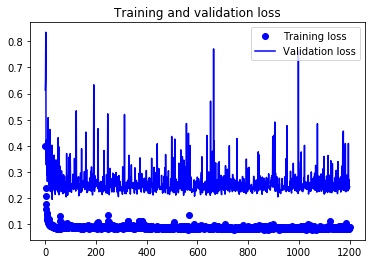

In [30]:
# import matplotlib.pyplot as plt
# #acc = history.history['acc']
# #val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(loss) + 1)

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.savefig('Watching_TV_train_val_loss_curve.jpg')  # saves the current figure
# plt.show()

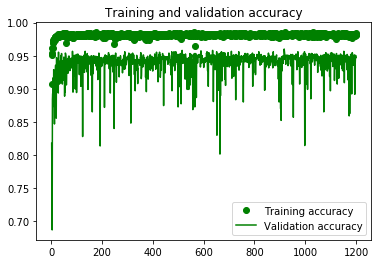

In [31]:
# import matplotlib.pyplot as plt
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'go', label='Training accuracy')
# plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.savefig('Watching_TV_train_val_accuracy_curve.jpg')  # saves the current figure
# plt.show()

## Testing the model

In [ ]:
y_p = model.predict(test_features, verbose=0)
results = y_p

## Classification Metrics

In [ ]:
results[results<=0.5]=0
results[results>0.5]=1

In [ ]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, results)

In [ ]:
cm

In [ ]:
y_pred = results
y_true = test_labels

In [ ]:
accuracy = format(accuracy_score(y_true, y_pred),'.4f')


sensitivity = format(recall_score(y_true, y_pred,pos_label=1,average='binary'),'.4f')

specificity = format(recall_score(y_true, y_pred,pos_label=0,average='binary'),'.4f')

print('Accuracy : ', accuracy)   
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

In [ ]:
print ("Features_extraction complete. Time elapsed: " + str(int(time.time()-current_t )) + "s")

## Save JSON file with time and label information

In [ ]:
kf = results

In [ ]:
hf = pd.DataFrame(kf)

In [ ]:
mf = pd.DataFrame(columns=['Watching_TV'])

In [ ]:
videoFile = "/mnt/sde/jagadish/userdata/IMG_8307.MOV"
cap = cv.VideoCapture(videoFile)   # capturing the video from the given path
fps = cap.get(cv.CAP_PROP_FPS) # Getting Franme rate of the video

In [ ]:
fps

In [ ]:
n= hf.index
l=[]
c=0
for i in n[:] :
    
    l.append(c/fps)
    l.append(hf.iloc[i][0])
    
    mf = mf.append({'Watching_TV':l[:]}, ignore_index=True)
    l=[]
    c+=1

In [ ]:
mf.head()

In [ ]:
mf.to_json('Time_and_Label_8307.json')

## Plot and save "Time vs Label" graph

In [ ]:
pf = pd.DataFrame(columns=['Time', 'Label'])

In [ ]:
n= hf.index
c=0
for i in n[:] :
    

    
    pf = pf.append({'Time': c/fps, 'Label': hf.iloc[i][0]}, ignore_index=True)

    c+=1

In [ ]:
pf.head()

In [ ]:
time = pf['Time']
label1 = pf['Label']

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(time, label1, 'g')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xticks(fontsize=20, fontweight='bold',rotation=90)
plt.yticks(fontsize=20, fontweight='bold')
plt.xlabel('Time (seconds)',fontsize=20, fontweight='bold')
plt.ylabel('Label',fontsize=20, fontweight='bold')
plt.title('Time vs Label', fontsize=20, fontweight='bold')
plt.tight_layout()
#plt.legend()
plt.savefig('Time_and_Labels_8307.pdf')  # saves the current figure
plt.show()

In [ ]:
of = pd.DataFrame(data=results,columns=['Label'])

In [ ]:
of

In [ ]:
of.to_csv('out22.csv', index=False)